## Brain Tumor Prediction with Convolutional Neural Network (CNN)

-  It is a type of deep learning neural network that is commonly used for image and video processing tasks. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input data, such as images, and are able to capture important characteristics of the data, such as edges, shapes, and textures.
- The key component of a CNN is the convolutional layer, which applies a set of filters (also known as kernels or weights) to the input data to extract relevant features. These filters slide over the input data and perform element-wise multiplication and summation to produce a single output value. By learning the optimal set of filters during training, the network can effectively detect and extract important features from the input data.
- In addition to convolutional layers, CNNs also typically include pooling layers, which downsample the feature maps produced by the convolutional layers, and fully connected layers, which learn to classify the extracted features. CNNs are trained using backpropagation, a gradient-based optimization algorithm that adjusts the weights and biases of the network to minimize the difference between predicted and actual outputs.
- CNNs have shown impressive results in a variety of computer vision tasks, such as image classification, object detection, image segmentation, and more, and are a powerful tool in the field of deep learning.

1. Introduction: (Chiamaka)

- Background on brain tumors and their diagnosis
- Overview of deep learning and CNNs

2. Data: (Shomoita)

- Source of the data used in the project
- Description of the dataset and its features
- Preprocessing steps applied to the data

3. Architecture of the CNN model: (Alan)
- Description of the layers and their purpose
- Hyperparameters of the model and their selection
- Training and testing of the model

4. Results: (Chien)

- Metrics used to evaluate the performance of the model
- Accuracy, precision, recall, and F1 score of the model
- Confusion matrix and ROC curve analysis

5. Discussion: (Nick)

- Interpretation of the results and their significance
- Limitations of the model and areas for improvement
- Implications of the model for medical diagnosis and treatment

6. Conclusion: (Jimi)

- Summary of the project and its objectives
- Key takeaways from the project
- Future directions for research in this area


#### Import necessary library

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from IPython.display import Image
import math
from IPython.display import Image, display, HTML

In [2]:
path = "C:\\Users\\alan\\AI Project\\CSC547 Final Project\\"

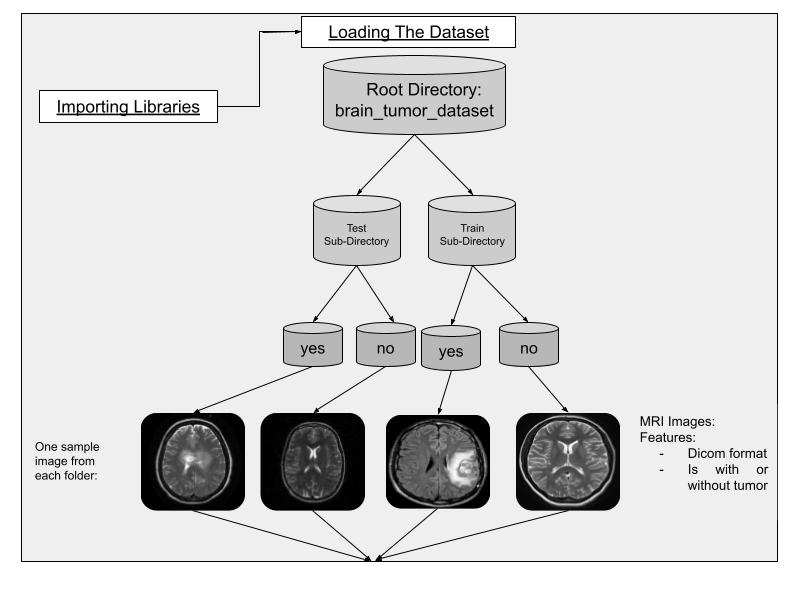

In [3]:
Image(filename='Dataset-Details-Project.jpg',width=800)

## Load Data

In [4]:
# Directory of root folder of dataset (split into Train and Test Folders within that directory)
direct_base = "brain_tumor_dataset" 

In [5]:
# Created a label
classes = ['no','yes']
train_count = 202
test_count = 51
epochs = 8

In [6]:
train_dataset_dir = direct_base+"\\train"
test_dataset_dir  = direct_base+"\\test"

In [7]:
file =  "CSC547 Final Project"

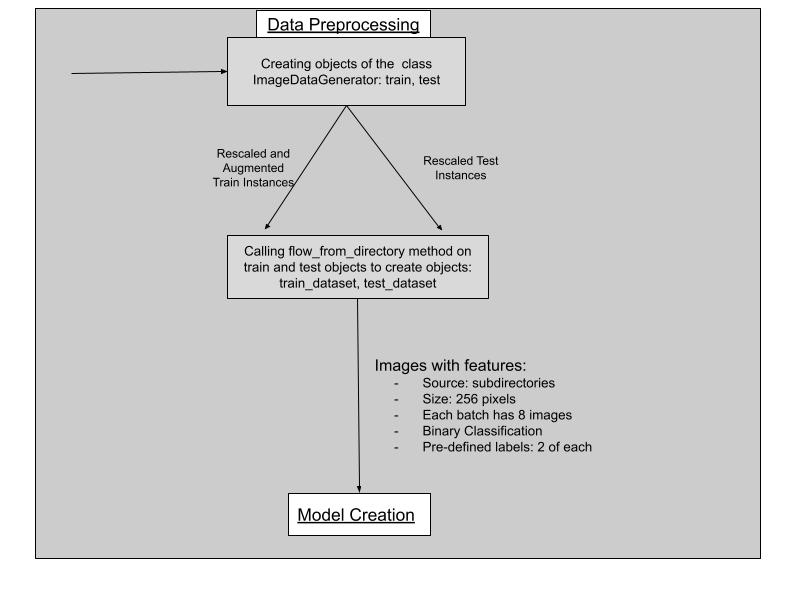

In [8]:
Image(filename='Dataset_Details-Project.jpg',width=800)

#### Normalize the data (Preprocessing)
- DataGenerator rescales the pixel values of the images by dividing them by 255. This is a common preprocessing step for image data in deep learning as it scales the pixel values to be in the range [0, 1], which can improve model performance and stability.

In [9]:
# note: you can add other data augmentation functions to the ImageDataGenerator if you want
# Here is a page with what you can add to the ImageDataGenerator:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

train = ImageDataGenerator(rescale = 1/255, horizontal_flip=True)
test = ImageDataGenerator(rescale = 1/255)

In [10]:
# create a stream of images, resized to 256x256, grouped into batches of size 8, and classified into 2 categories
train_dataset = train.flow_from_directory(train_dataset_dir, target_size = (256,256), batch_size=8, class_mode='binary', classes = classes)
test_dataset  = test.flow_from_directory(test_dataset_dir, target_size = (256,256), batch_size=8, class_mode='binary', classes = classes)

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


## Create Model

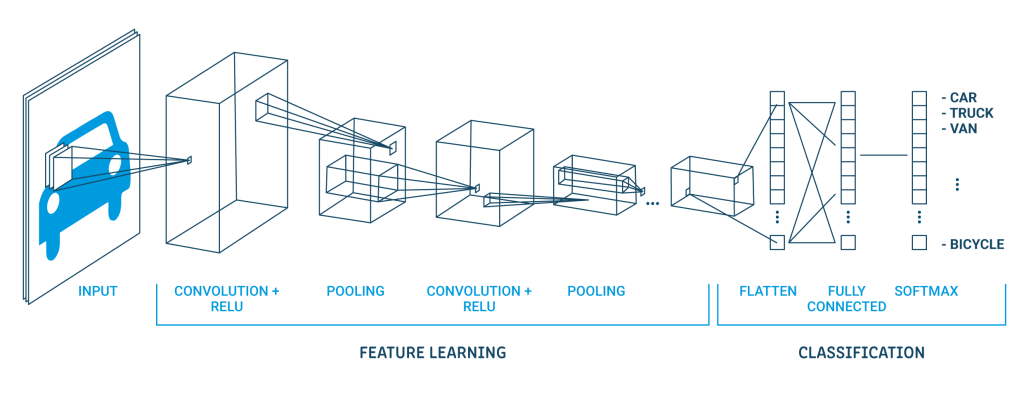

In [11]:
Image(filename='CNN1.png')

In [12]:
model = Sequential() # create a new sequential model

#### Architecture of the CNN model

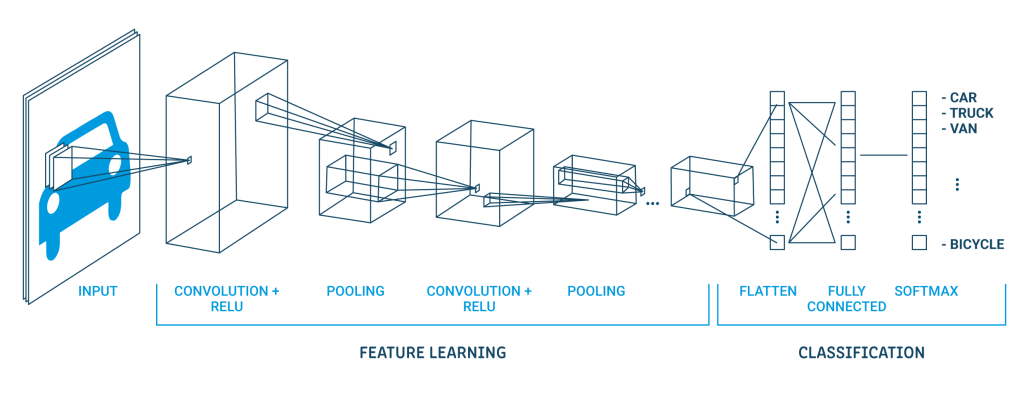

In [13]:
Image(filename='CNN1.png',width = 1000)

#### Adding Convolutional Layers 

In [14]:
# Add a 2D convolution layer

model.add(Conv2D(32, (5,5), activation='relu', padding = 'same', input_shape=(256,256,3)))


Convolutional layers are used in deep learning models to extract features from input data. 
- 16 is the number of filters (or channels) in the layer. 3x3 is the size of the filter (or kernel) Filters are the "neurons" of the layer and learn to detect different features in the input data.
- "relu" activation function
- padding = 'same' specifies the padding mode to be used in the layer. Padding is used to preserve the spatial dimensions of the input data after convolution. 'same' padding adds padding to the edges of the input data to ensure that the output of the convolutional
- the input data is expected to be 3-dimensional with a height of 256, a width of 256, and 3 color channels (for a color image). This is the input shape for the first layer of the model.

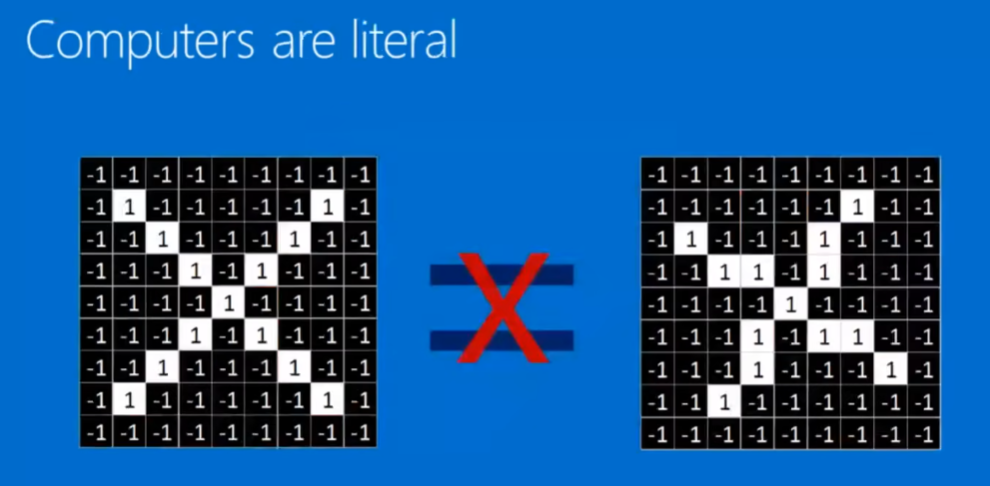

In [15]:
Image(filename='CNN4.png',width=500)

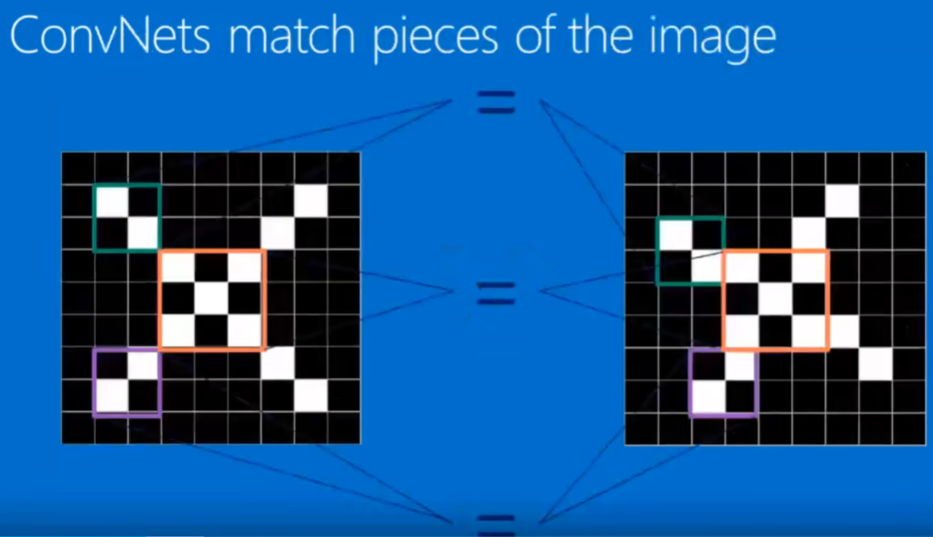

In [16]:
Image(filename='CNN3.png',width=500)

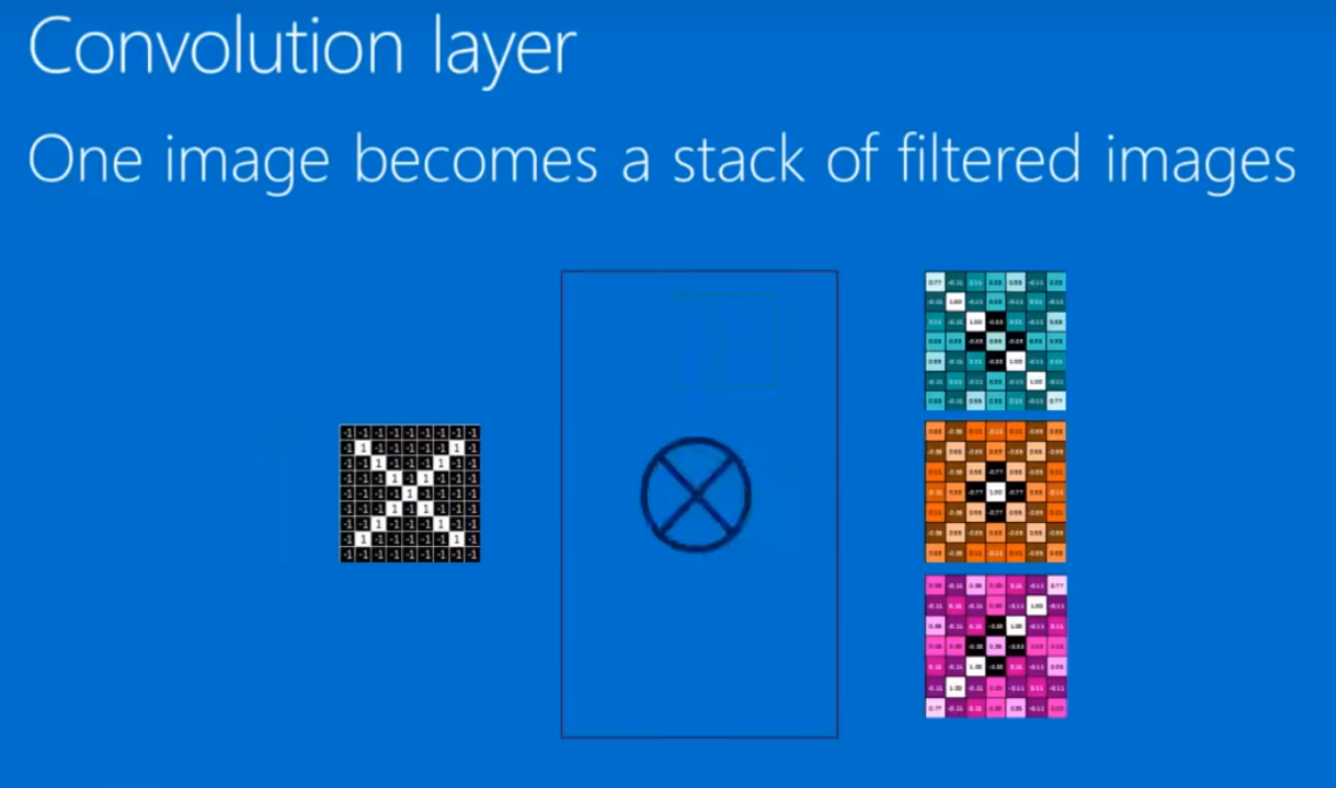

In [17]:
Image(filename='CNN5.png',width=500)

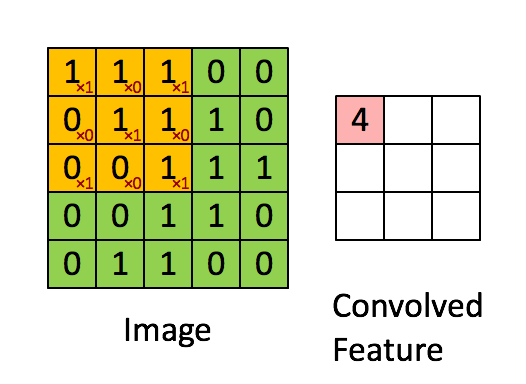

In [18]:
Image(filename='feature extra.gif',width=500)

####  Adding 2D max pooling layer
- Shrinking the image stack
- Max pooling layers are used in deep learning models to downsample feature maps by selecting the maximum value within a pooling window.
- 2 is the size of the pooling window in both the height and width dimensions.
- A stride of 2 means that the pooling window will be moved 2 pixels at a time when computing the output of the layer

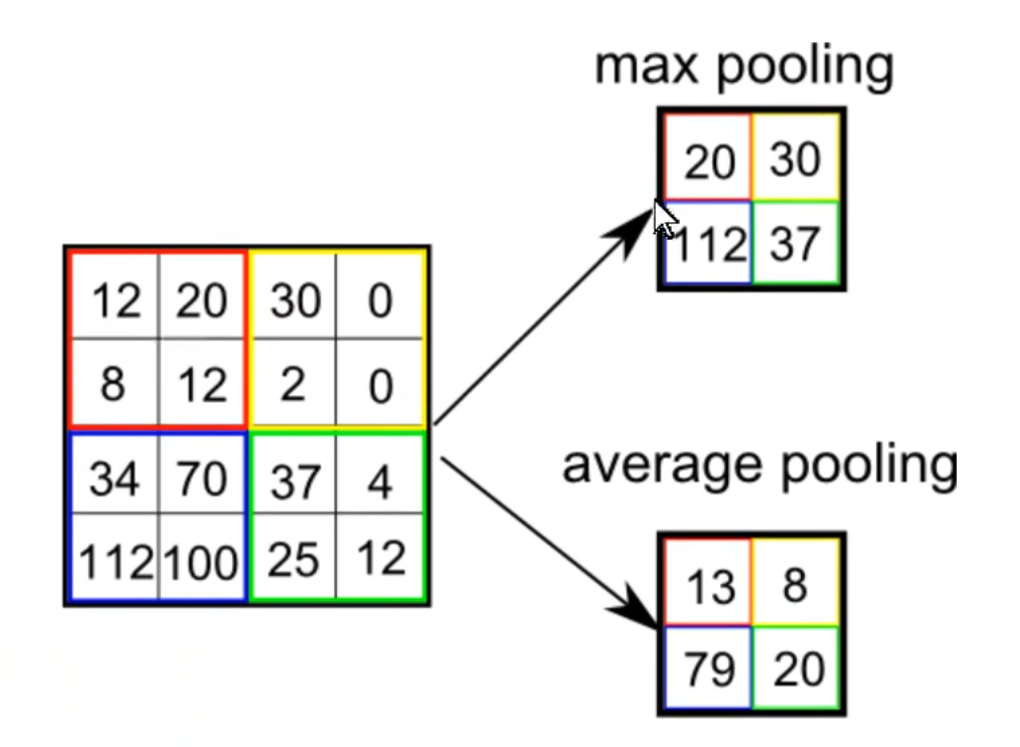

In [19]:
Image(filename='CNN7.png',width=500)

In [20]:
# Add a Max Pool layer with a 2x2 pooling window

model.add(MaxPool2D(2, 2))


#### Adding more layers
- The number of features in a convolutional layer controls the number of filters, or "neurons", in the layer. Each filter learns to detect a different feature in the input data, and increasing the number of features in a layer can allow the network to learn more complex representations of the data.

- The first convolutional layer has 16 features, the second has 32 features, the third has 64 features, and the fourth has 128 features. The network is becoming progressively deeper and more complex, with more filters in each layer to learn more detailed representations of the input data.


In [21]:
# These are the same as above, except the convolution has 64 features
model.add(Conv2D(64, (3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

# These are the same as above, except the convolution has 128 features
model.add(Conv2D(128, (3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

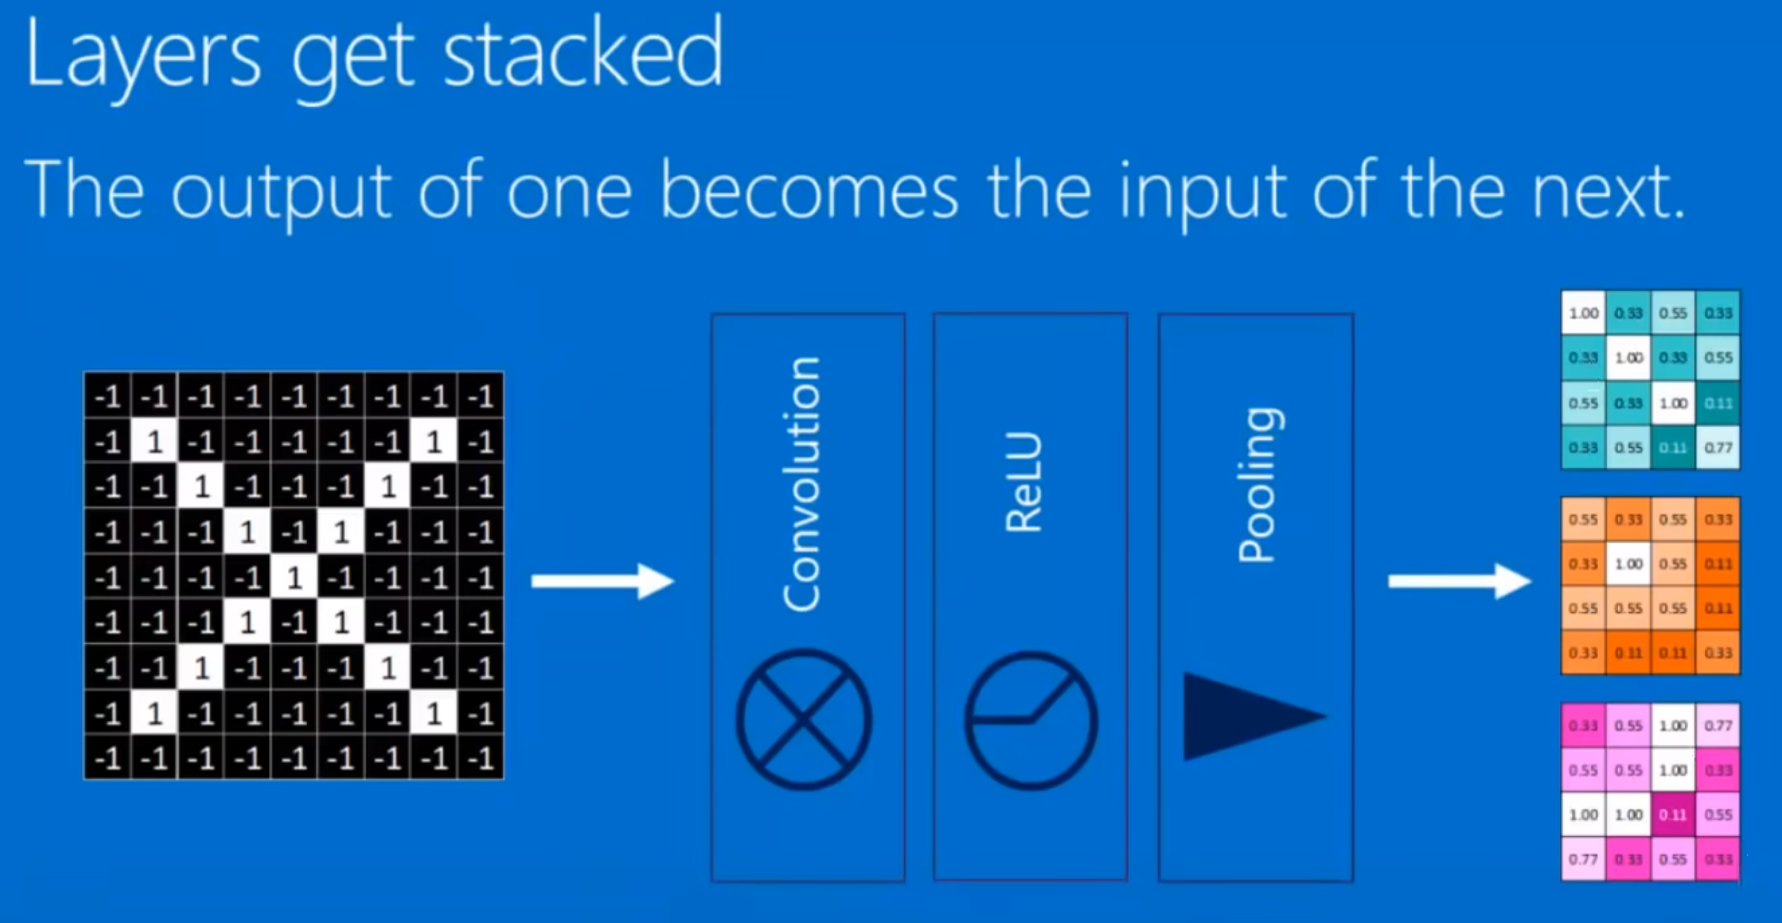

In [22]:
Image(filename='CNN8.png',width=700)

#### Adding Flatten Layer
- represents a layer that flattens the input data into a 1D array. This is typically used to convert the output of a convolutional layer. which is a 3D tensor, into a 1D tensor that can be fed into a fully connected layer.

In [23]:
# Flatten into a single vector

model.add(Flatten())


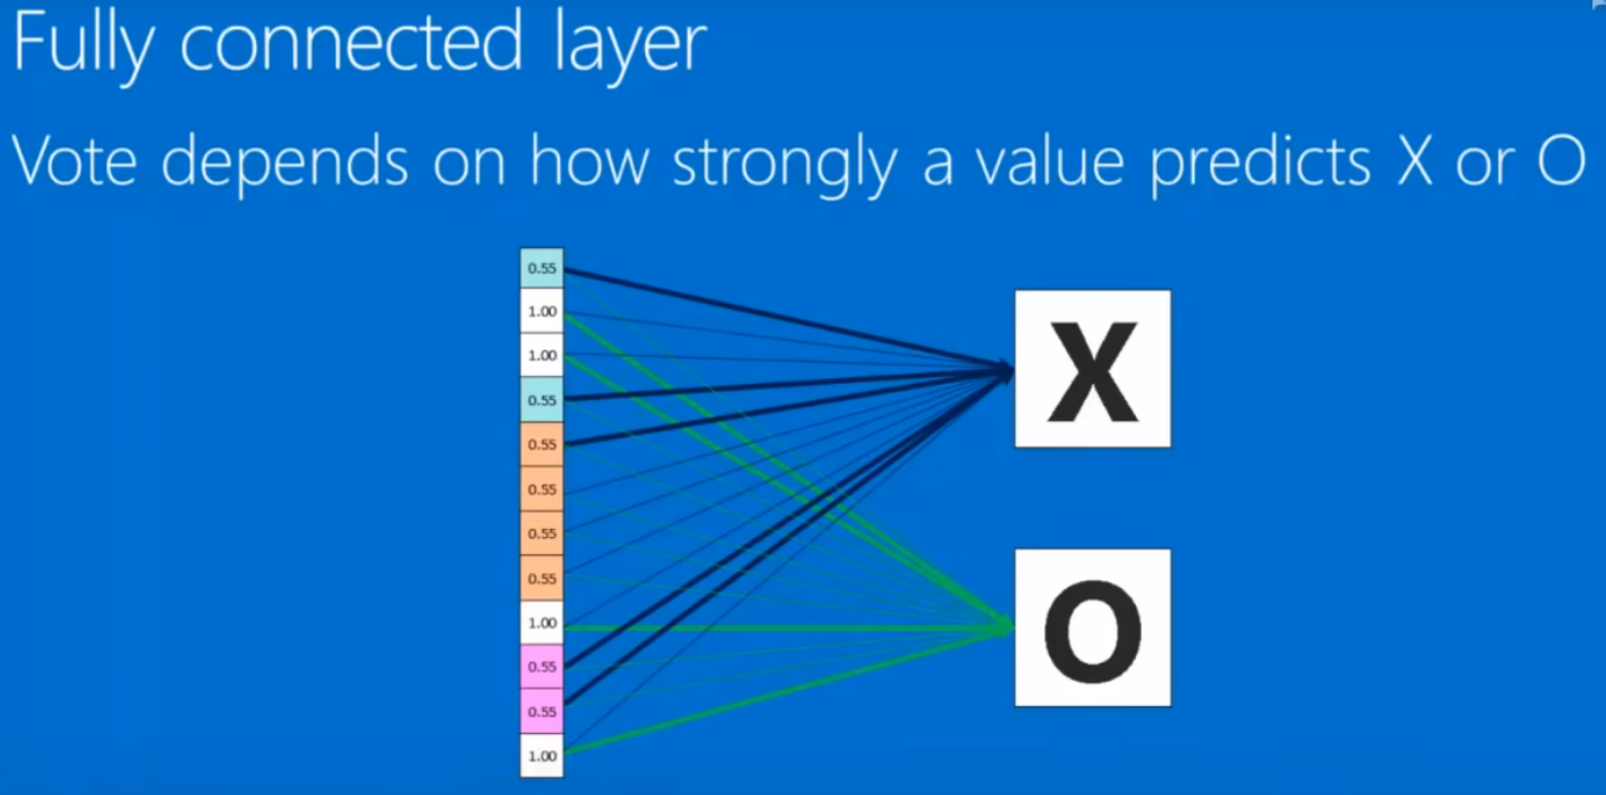

In [24]:
Image(filename='CNN10.png',width=700)

In [25]:
# Add a dense layer to 128 nodes (to extract relationships between features)

model.add(Dense(128))

# Final Dense layer with 1 node and "sigmoid" activation function to extract a binary prediction 
# (whether an image contains a tumor or not).

model.add(Dense(1, activation='sigmoid'))

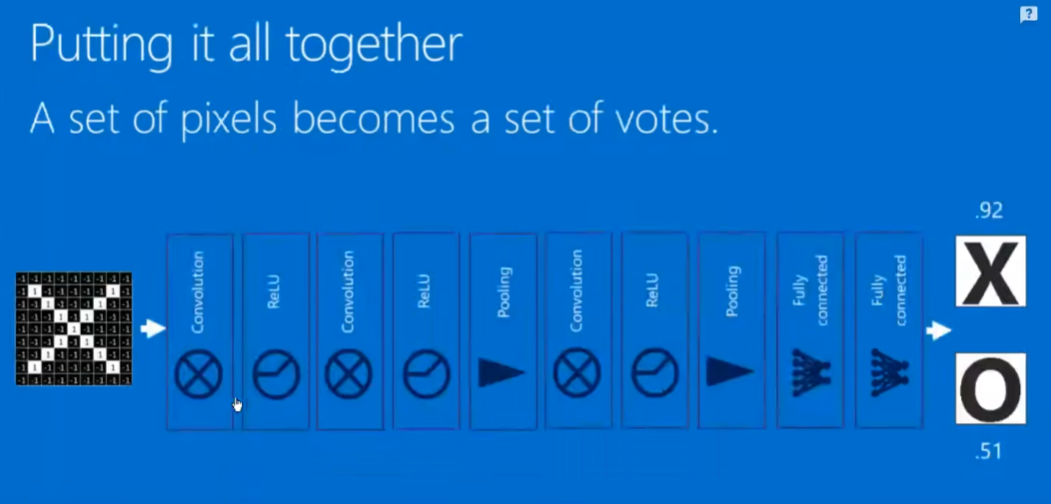

In [26]:
Image(filename='CNN9.png',width=700)

In [27]:
# Compile the model using adam optimization, calculating loss using binary cross-entropy loss, and collect the metrics listed
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics = ['accuracy', AUC(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives()])

In [28]:
# Print out a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

## Model Training

In [29]:
# Train the model on the training dataset over 8 epochs, using the test dataset to validate the results
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=epochs, validation_data=test_dataset)

Epoch 1/8
26/26 [==============================] - 7s 221ms/step - loss: 1.2709 - accuracy: 0.6139 - auc: 0.5637 - true_positives: 88.0000 - true_negatives: 36.0000 - false_positives: 42.0000 - false_negatives: 36.0000 - val_loss: 0.4821 - val_accuracy: 0.8431 - val_auc: 0.8927 - val_true_positives: 31.0000 - val_true_negatives: 12.0000 - val_false_positives: 8.0000 - val_false_negatives: 0.0000e+00
Epoch 2/8
26/26 [==============================] - 7s 255ms/step - loss: 0.5340 - accuracy: 0.7426 - auc: 0.7873 - true_positives: 104.0000 - true_negatives: 46.0000 - false_positives: 32.0000 - false_negatives: 20.0000 - val_loss: 0.4351 - val_accuracy: 0.9020 - val_auc: 0.9177 - val_true_positives: 31.0000 - val_true_negatives: 15.0000 - val_false_positives: 5.0000 - val_false_negatives: 0.0000e+00
Epoch 3/8
26/26 [==============================] - 5s 207ms/step - loss: 0.4706 - accuracy: 0.8069 - auc: 0.8420 - true_positives: 111.0000 - true_negatives: 52.0000 - false_positives: 26.0000 

In [30]:
# Extract the last validation set's metrics
tp = history.history['val_true_positives'][epochs-1]
fp = history.history['val_false_positives'][epochs-1] # Num samples incorrectly labeled as Positive
tn = history.history['val_true_negatives'][epochs-1]
fn = history.history['val_false_negatives'][epochs-1] # Num samples incorrectly labeled as Negative

accuracy = (tp+tn) / test_count # How often we are correct
precision = tp / (tp+fp) # Percentage of true positives
sensitivity = tp / (tp + fn) # Perecentage of positives correctly labeled 'recall'
specificity = tn / (tn + fp) # How well we predict negative results
f_score = 2* ((precision * sensitivity) / (precision + sensitivity)) # harmonic mean

# Poor man's confusion matrix
print('True Negatives: '+str(tn) + ' | False Positives: '+str(fp))
print('False Negatives: '+str(fn) + ' | True Positives: '+str(tp))
print()

print('Accuracy: '+str(round(accuracy,2))+'%')
print('Precision: '+str(round(precision,2))+'%')
print('Sensitivity: '+str(round(sensitivity,2))+'%')
print('Specificity: '+str(round(specificity,2))+'%')
print('F-Score: '+str(round(f_score,2))+'%')

True Negatives: 19.0 | False Positives: 1.0
False Negatives: 6.0 | True Positives: 25.0

Accuracy: 0.86%
Precision: 0.96%
Sensitivity: 0.81%
Specificity: 0.95%
F-Score: 0.88%


In [31]:
import numpy as np
import cv2
# cv2 module provides functions and tools for reading and writing image and video files 
# applying filters and transformations to images, and detecting objects in images and video streams.

## Final Prediction

In [32]:
import matplotlib.pyplot as plt

#### Data Processing

In [33]:
# load a new image that the model has never seen before.

new_image = cv2.imread(direct_base+'/unseen data with brain tumor.jpg')

In [34]:
# data processing, reshape image into 256x256
new_image = cv2.resize(new_image, (256, 256))

# make the data compatible with deep learning models that expect input data in the form of batches.
new_image = np.expand_dims(new_image, axis=0)

# scales the pixel values of the image to be between 0 and 1 by dividing them by 255
new_image = new_image / 255.0

### Prediction

In [36]:
# This returns an array of predicted probabilities for each class label in the model.
predictions = model.predict(new_image, verbose=False)

# Since we are using a binary classification, a score of over 0.5 is considered true. So we add 0.5
# to the result and round down.
class_index = math.floor(predictions[0][0]+0.5)

class_label = classes[class_index]
print('Image with Brain tumor or not:', class_label)

Image with Brain tumor or not: no


## Data Visualization

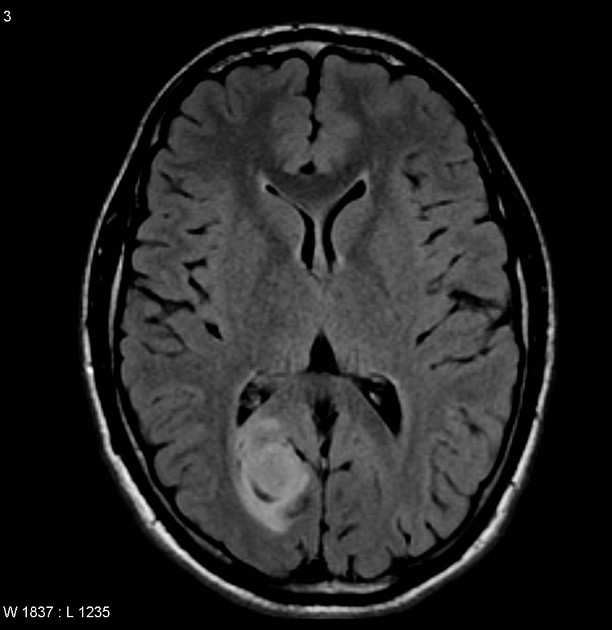

In [37]:
Image(filename='unseen data with brain tumor.jpg',width=200)

## Interpretations 

### Benefits
 - Fairly high accuracy and low rate of false negatives means the model can be trusted to make correct choices, with less human correction required.
 - Rather quick performance due to usage of max-pooling layers to reduce sample space.
 - Can help save time with classifying images, freeing up the examiner to work on other tasks as they only need to check to make sure it isn't wrong.

### Limitations
 - Small number of samples means it's harder to get a good apprasial of the model that would be suitable for the rigorous standards of the medical field.
 - Data pre-processing could be improved.
   - We don't constrain the image to just the brain (see above).
   - Lots of dark padding around the image.
   - Words are still present in the data, which could be affecting results.